In [117]:
import rosbag_pandas as rbp
import pandas as pd
import rosbag
import math
import matplotlib.pyplot as plt
import datetime
import lz4
import numpy as np

In [138]:
df = rbp.bag_to_dataframe('/home/gera/op3_bag/pid/25_03/1300/2019-03-25-16-33-17.bag')

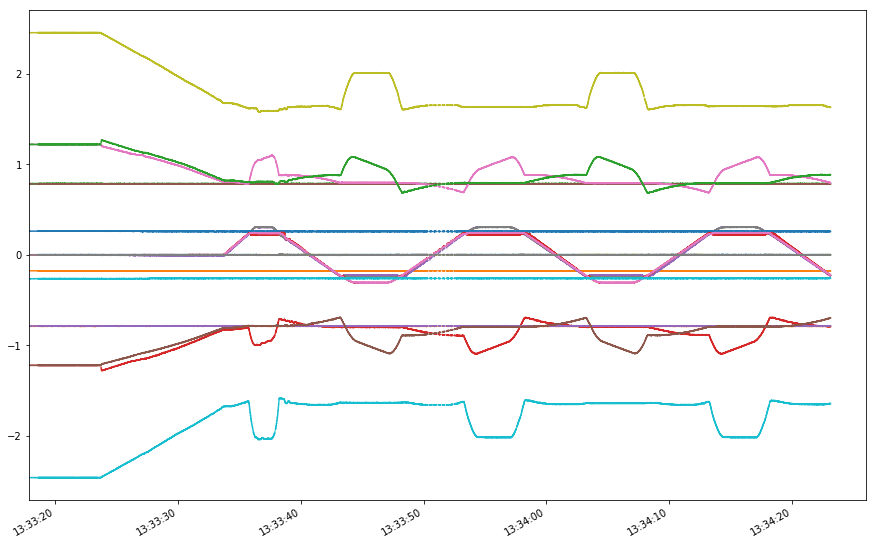

In [142]:
df.index = pd.to_datetime(df.index, unit='s').tz_convert('Europe/Moscow')
dz = df.copy(deep=True)
df.filter(regex="/present_joint_states/position", axis=1).resample("8L").mean().plot(legend=False, figsize=(15, 10))

In [143]:
df_errs = pd.DataFrame()
joint_dic = {2:'l_ankle_pitch',3:'l_ankle_roll', 5:'l_hip_pitch',
             6:'l_hip_roll', 7:'l_hip_yaw', 8:'l_knee_pitch',
             11:'r_ankle_pitch', 12:'r_ankle_roll', 14:'r_hip_pitch',
             15:'r_hip_roll', 16:'r_hip_yaw', 17:'r_knee_pitch'}
#print(joint_dic)

for i in range(2,18): # Joint numbers
    # skip not leg joints
    if (i==4 or i==9 or i==10 or i==13):
        continue
    df_goal = df.filter(regex=('goal_joint_states/position/' + str(i)))
    df_pres = df.filter(regex='present_joint_states/position/' + str(i))
    df_comp = df_goal.join(df_pres)
    # add new column according to joint_dic
    df_errs[joint_dic[i]] = df_comp['/robotis/present_joint_states/position/' + str(i)].sub(df_comp['/robotis/goal_joint_states/position/' + str(i)])

#df_errs[joint_dic[2]].dropna().plot(legend=True, figsize=(15, 10))

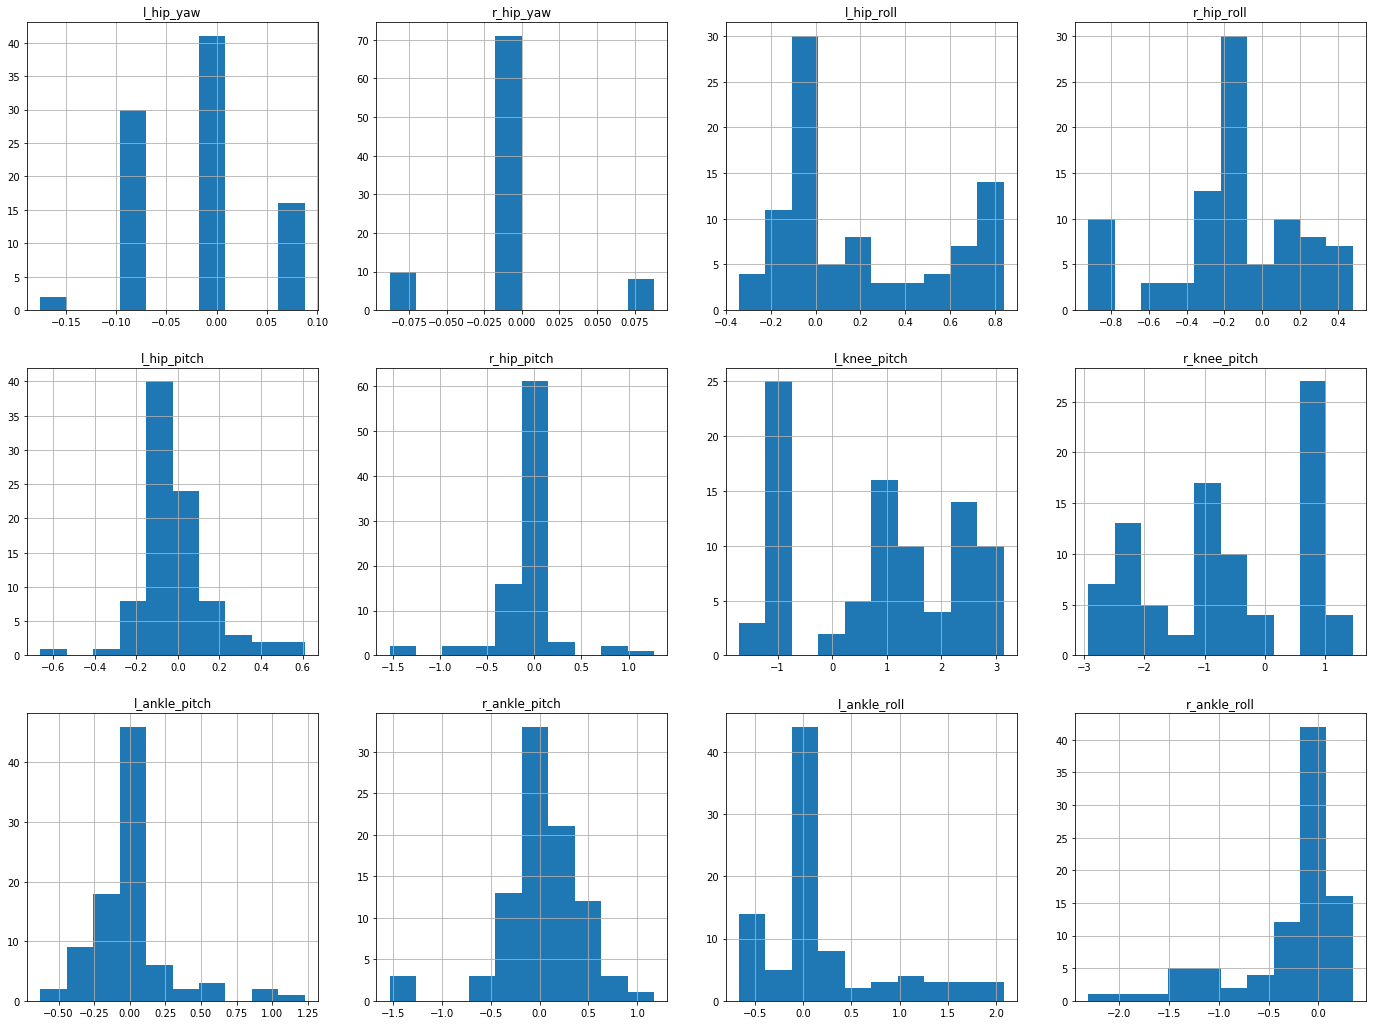

In [144]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24,18))
joint_dic_ = {0:'l_hip_yaw',     1:'r_hip_yaw',        2:'l_hip_roll',    3:'r_hip_roll',
              4:'l_hip_pitch',   5:'r_hip_pitch',      6:'l_knee_pitch',  7:'r_knee_pitch',
              8:'l_ankle_pitch', 9:'r_ankle_pitch',   10:'l_ankle_roll', 11:'r_ankle_roll'}

df_errs_deg = df_errs.copy(deep=True)
# radians to degrees
df_errs_deg = df_errs_deg.mul(180.0/np.pi)
m = 0
n = 0
for i in joint_dic_: # Joint numbers
    df_errs_deg[joint_dic_[i]].hist(ax=axes[m, n]);
    axes[m, n].set_title(joint_dic_[i]);
    #print(m,n)
    n = n + 1
    if n > 3:
        n = 0
        m = m + 1
    


In [145]:
df_errs_deg.to_csv('err_deg_p_1300.csv')
df_errs.to_csv('err_rad_p_1300.csv')